<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/25_Sen_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re
import plotly.express as px
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.base import *
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

Titanic da 4 ta Feature ni ishlatib tirik qolgan-qolmaganini topish.

  1. Har bir feature uchun alohida ROC-AUC score, Gini Coefficient, ROC curve va optimal threshold da Classification Reportni keltirish
  2. Eng ROC-AUC score past bo'lgan Feature larni birlashtirish va har qadamda tepadagi ko'rsatilgan ko'rsatkichlarni bizga ko'rsating, Siz 2ta, 3ta va 4ta Feature uchun Klassifikator qurishingiz kerak va ularga tepada ko'rsatilganlarni berishingiz kerak

In [19]:
df = pd.read_csv('/content/train.csv')

In [20]:
df[df['Cabin'].notna()].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.drop(columns=numerical_cols).columns

for col in categorical_cols:
  lbl = LabelEncoder()
  df[col] = lbl.fit_transform(df[col])

  # one_hot = OneHotEncoder(handle_unknown='ignore')
  # one_hot.fit(df[[col]])
  # df[one_hot.categories_[0]] = one_hot.transform(df[[col]]).toarray()
  # df.drop(col, axis=1, inplace=True)

In [34]:
df = df.fillna(df.mean())
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.25,147,2


In [42]:
y = df['Survived']

cols = ['Pclass', 'Sex', 'Age', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

fig = go.Figure()

for col in cols:
    X = df[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{col} (AUC = {roc_auc:.2f})'))


fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guess'))

fig.update_layout(
    title='ROC Curves for Different Features (Predicting Survived)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=800,
    height=600
)

fig.show()

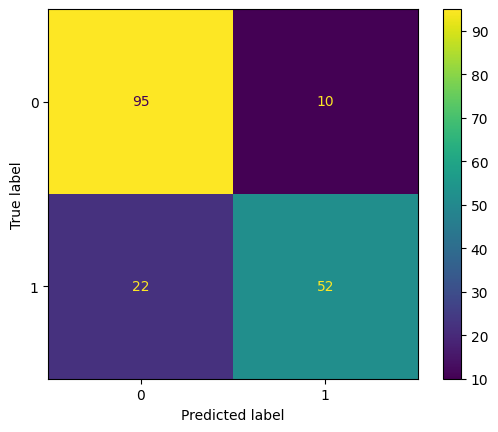

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

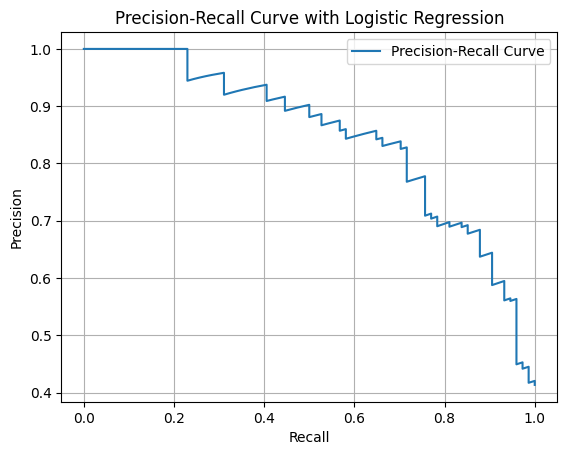

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Logistic Regression')
plt.grid()
plt.legend()
plt.show()

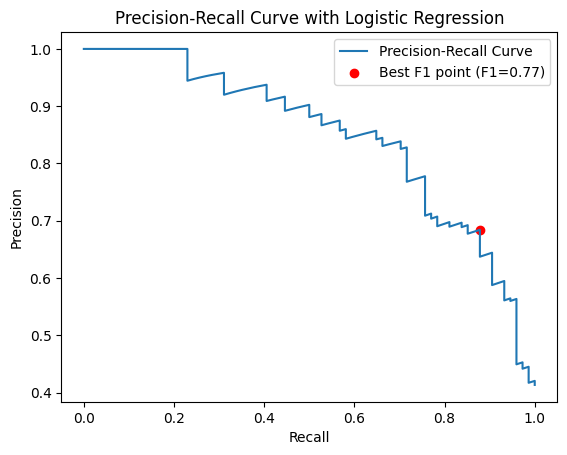

In [26]:
f1_scores = 2 * (precision * recall) / (precision + recall)

best_index = f1_scores.argmax()
best_index

best_threshold = thresholds[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(recall[best_index], precision[best_index], color='red', label=f'Best F1 point (F1={f1_scores[best_index]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Logistic Regression')
plt.legend()
plt.show()